# Simple orders analysis

🚀 We are finally ready to start analysing our `orders` dataset!

Our objective is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [1]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=False)

In [4]:
# Check your shape below

# Shape if you set with_distance_seller_customer=True
if orders.shape[1] == 13: 
    assert(orders.shape == (95872, 13))

# Shape if you set with_distance_seller_customer=False    
else:  
    assert(orders.shape == (96353, 12))

## 1 - Inspect features

👉 Print summary statistics of each column of the order dataset (then focus in particular on `wait_time`)

In [5]:
summary_statistics = orders.describe()
print(summary_statistics)

summary_statistics_objects = orders.describe(include=['O'])
print(summary_statistics_objects)

wait_time_statistics = orders['wait_time'].describe()
print(wait_time_statistics)

          wait_time  expected_wait_time  delay_vs_expected  dim_is_five_star  \
count  96353.000000        96353.000000       96353.000000      96353.000000   
mean      12.058472           23.378317           0.700186          0.592187   
std        9.462698            8.756581           4.556334          0.491431   
min        0.000000            2.000000           0.000000          0.000000   
25%        6.000000           18.000000           0.000000          0.000000   
50%       10.000000           23.000000           0.000000          1.000000   
75%       15.000000           28.000000           0.000000          1.000000   
max      208.000000          155.000000         188.000000          1.000000   

       dim_is_one_star  review_score  number_of_products  number_of_sellers  \
count     96353.000000  96353.000000        96353.000000       96353.000000   
mean          0.097610      4.155688            1.141687           1.013918   
std           0.296788      1.284979      

In [9]:
summary_statistics = orders.info()
print(summary_statistics)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96353 entries, 0 to 97006
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            96353 non-null  object 
 1   wait_time           96353 non-null  float64
 2   expected_wait_time  96353 non-null  int64  
 3   delay_vs_expected   96353 non-null  float64
 4   order_status        96353 non-null  object 
 5   dim_is_five_star    96353 non-null  float64
 6   dim_is_one_star     96353 non-null  float64
 7   review_score        96353 non-null  float64
 8   number_of_products  96353 non-null  int64  
 9   number_of_sellers   96353 non-null  int64  
 10  price               96353 non-null  float64
 11  freight_value       96353 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 9.6+ MB
None


📈 Plot histograms to get a sense of the distribution of each numerical feature.

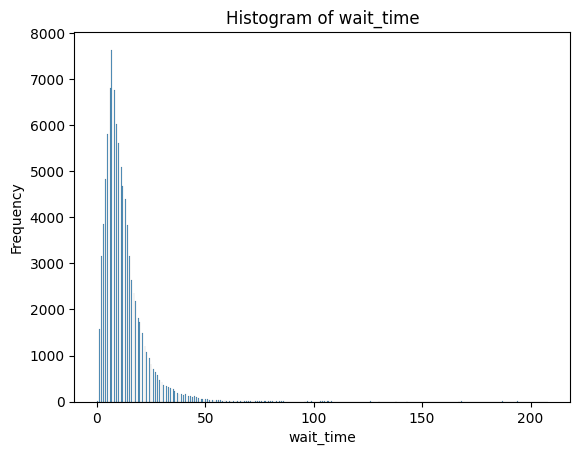

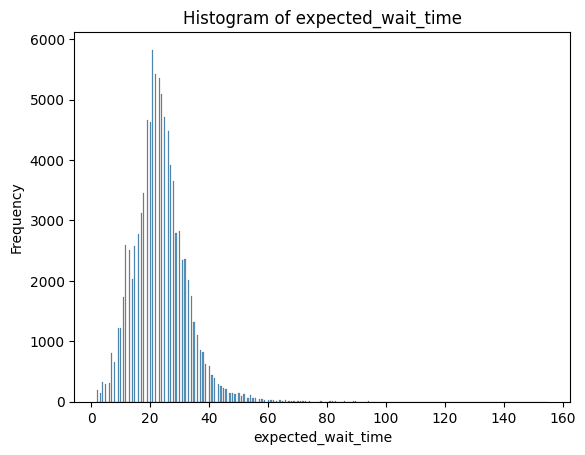

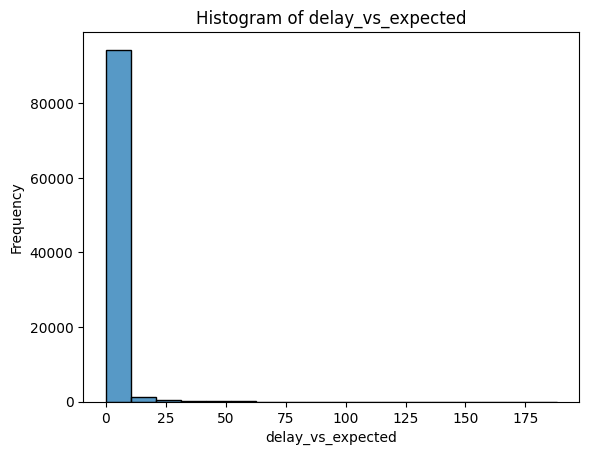

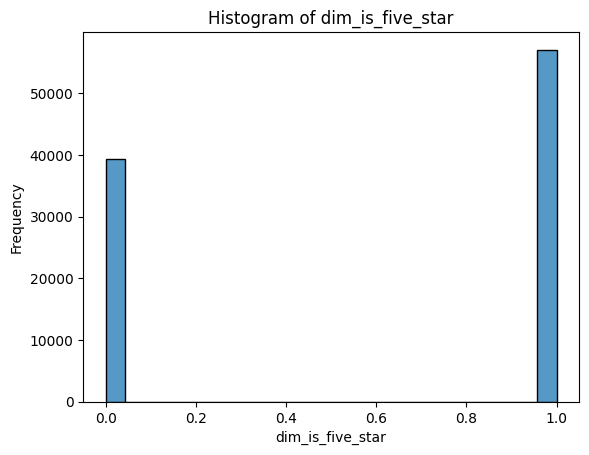

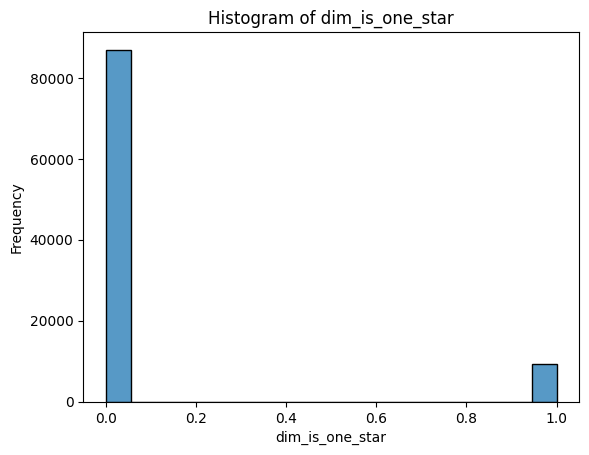

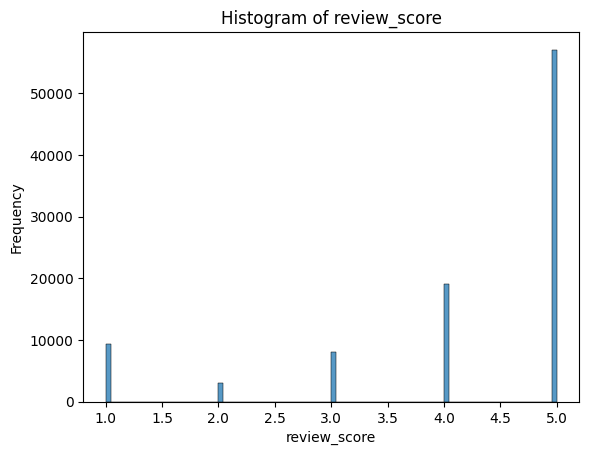

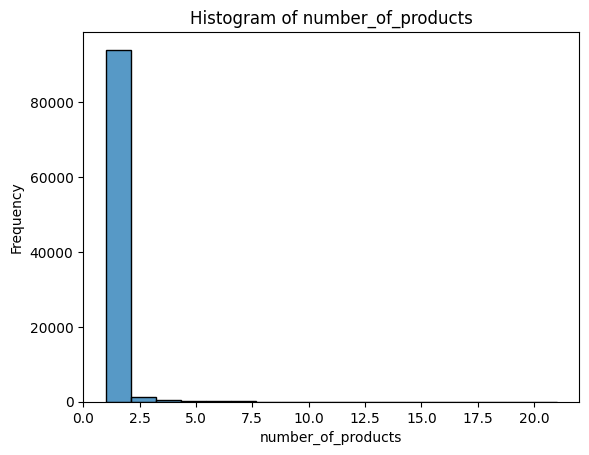

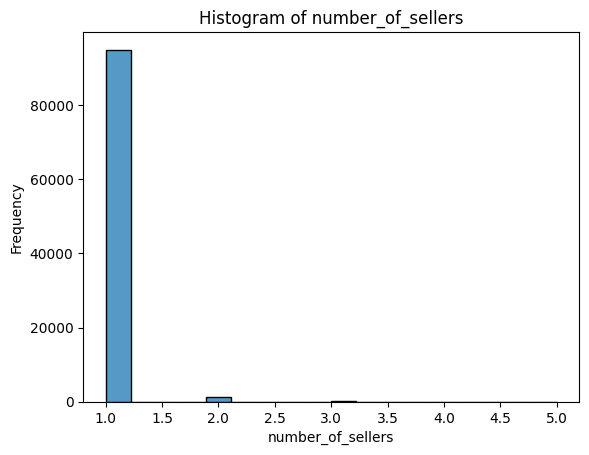

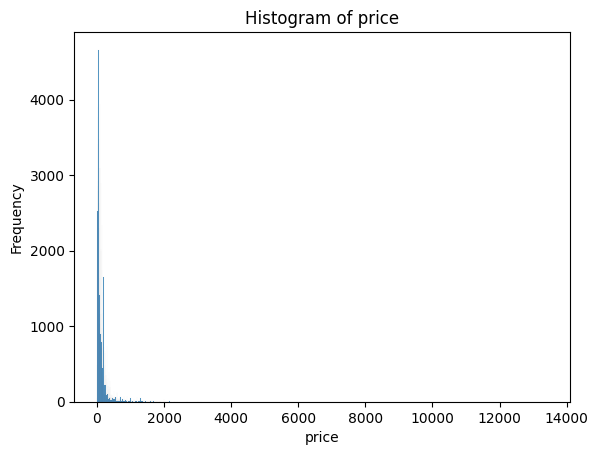

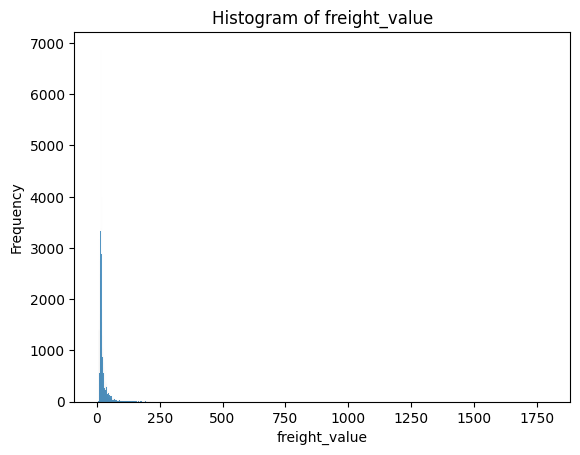

In [7]:
for column in orders.select_dtypes(include=[np.number]).columns:
    sns.histplot(orders[column], kde=False)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

👀 In particular, create a `sns.FacetGrid()` of histograms for each `review_score` vs. `wait_time`

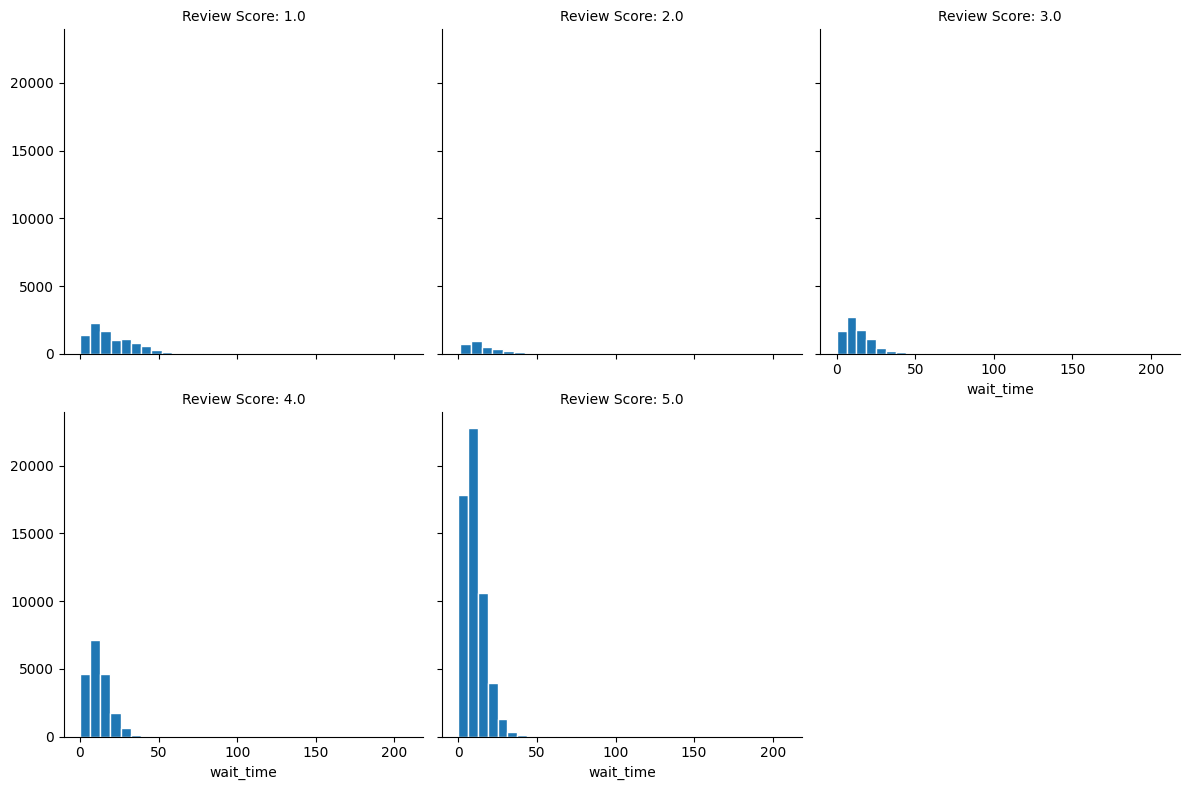

In [8]:
g = sns.FacetGrid(orders, col="review_score", col_wrap=3, height=4)
g.map(plt.hist, "wait_time", bins=30, edgecolor="w")
g.set_titles("Review Score: {col_name}")
g.fig.tight_layout(w_pad=1)
plt.show()

❓ What do you notice for the variables `price` and `freight_value` ? 

❓ Have a look at the  `distance_seller_customer` feature if you have created it in `order.py`

Summary Statistics for Price:
count    96353.000000
mean       136.654623
std        207.444085
min          0.850000
25%         45.900000
50%         86.000000
75%        149.900000
max      13440.000000
Name: price, dtype: float64

Summary Statistics for Freight Value:
count    96353.000000
mean        22.757810
std         21.496018
min          0.000000
25%         13.840000
50%         17.160000
75%         23.990000
max       1794.960000
Name: freight_value, dtype: float64


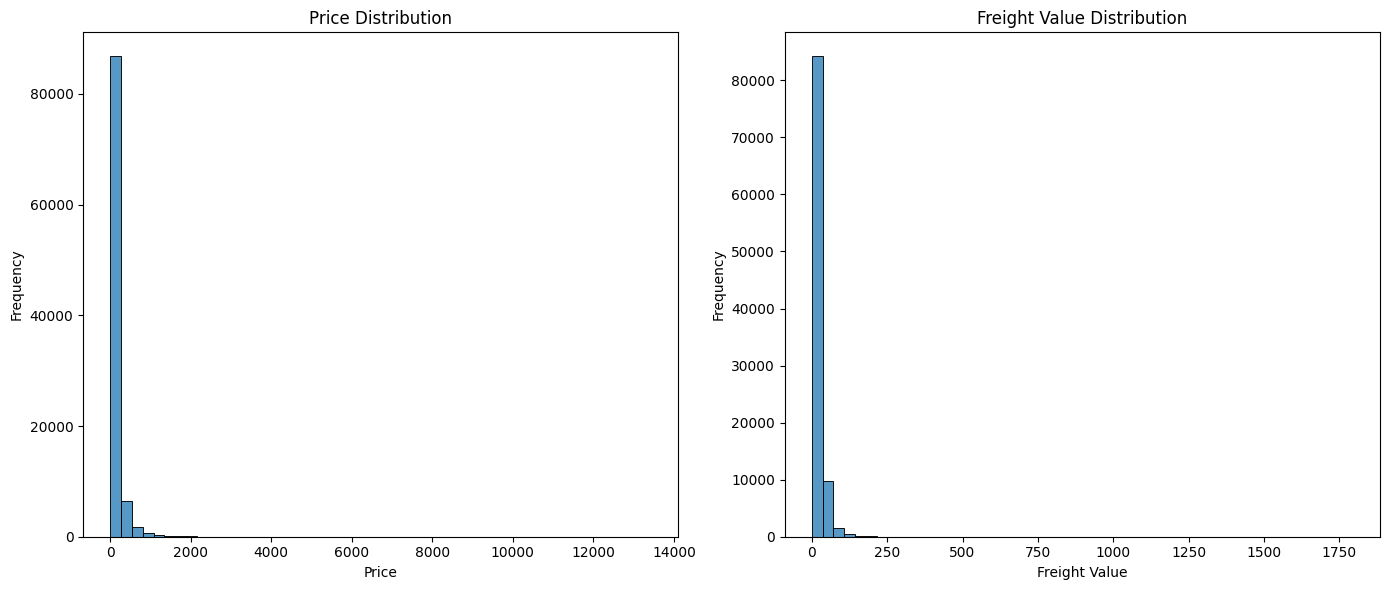

In [12]:
print("Summary Statistics for Price:")
print(orders['price'].describe())
print("\nSummary Statistics for Freight Value:")
print(orders['freight_value'].describe())

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(orders['price'], bins=50, kde=False)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(orders['freight_value'], bins=50, kde=False)
plt.title('Freight Value Distribution')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

if 'distance_seller_customer' in orders.columns:
    print("\nSummary Statistics for Distance Seller to Customer:")
    print(orders['distance_seller_customer'].describe())

    plt.figure(figsize=(8, 6))
    sns.histplot(orders['distance_seller_customer'], bins=50, kde=False)
    plt.title('Distance Seller-Customer Distribution')
    plt.xlabel('Distance (km)')
    plt.ylabel('Frequency')
    plt.show()

❓Inspect the various correlations between features: which feature seems to the most correlated with `review_score`?

<details>
    <summary>▸ Hint</summary>

* Use `DataFrame.corr()` combined with `sns.heatmap()` and `cmap='coolwarm'`
* Have a look at the absolute values of the correlation coefficients of `review_score` vs. each feature,
    * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

</details>

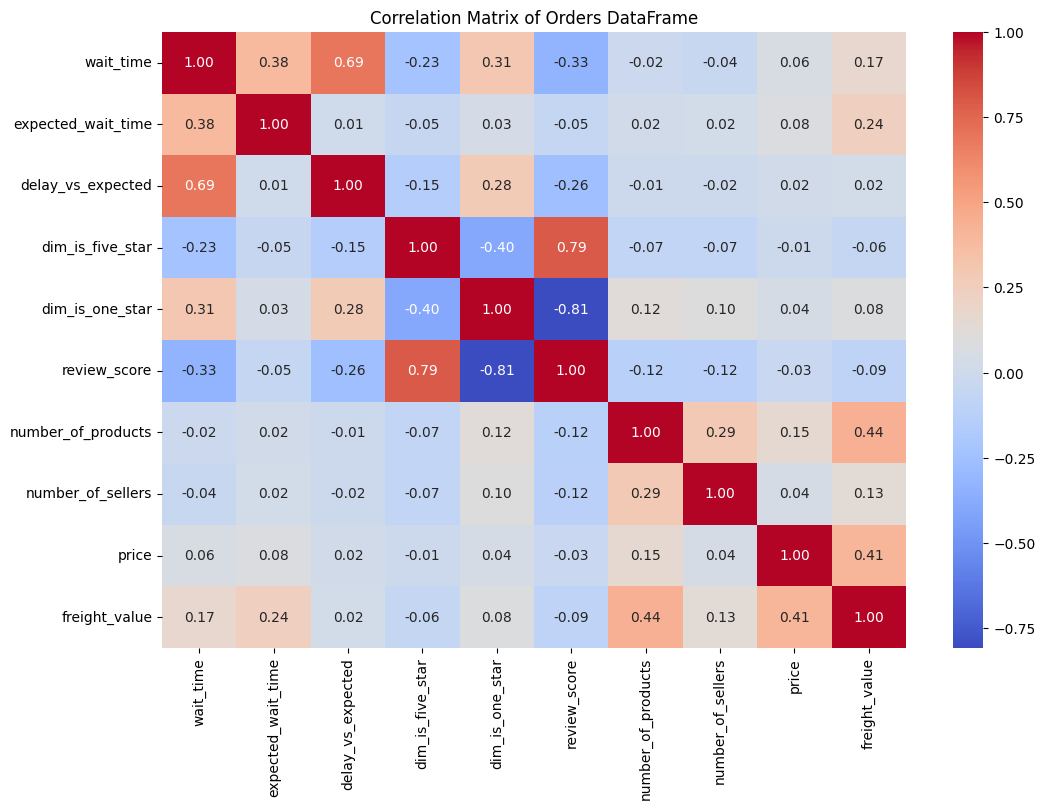

Correlation coefficients for 'review_score':
review_score          1.000000
dim_is_five_star      0.791787
price                -0.034742
expected_wait_time   -0.052304
freight_value        -0.090013
number_of_sellers    -0.116942
number_of_products   -0.123492
delay_vs_expected    -0.263228
wait_time            -0.333616
dim_is_one_star      -0.807700
Name: review_score, dtype: float64


In [10]:
correlation_matrix = orders.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Orders DataFrame')
plt.show()

review_score_correlation = correlation_matrix['review_score'].sort_values(ascending=False)
print("Correlation coefficients for 'review_score':")
print(review_score_correlation)

* 😏 _Captain Obvious :_
    * `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : - 27 %

## 2 - Simple regression of `review_score` against delivery duration

👉 So, it seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (- 27%).

🎨 Let's investigate these correlations  with `seaborn`

### 2.1 Plots
❓ In one figure, create 2 subplots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Tips</u>:

- Reduce your dataframe to a random sub-`sample of 10,000 rows` for speed purposes (a good practice in data exploration)
- Use `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution if needed
- Use `sns.regplot()` to plot the `regression lines`
- Add some `y_jitter` parameters to better visualize the scatterplot density
- Limit `xlim` and `ylim` to hide outliers

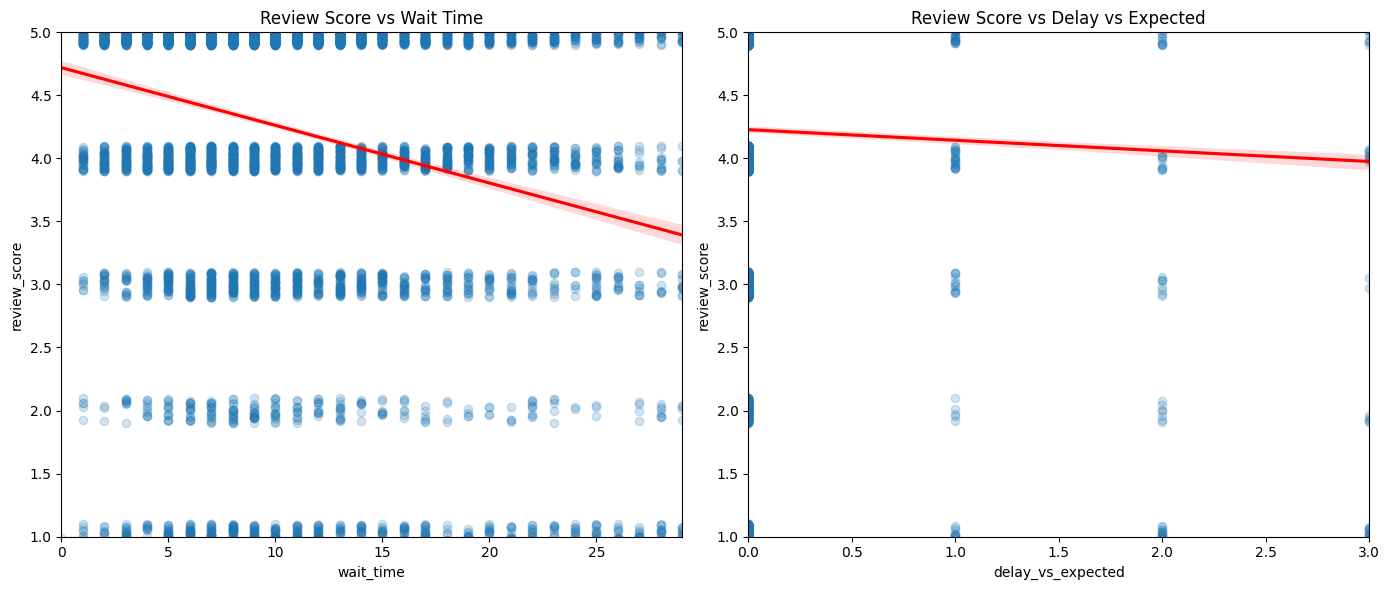

In [14]:
sampled_orders = orders.sample(n=10000, random_state=1)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.regplot(
    ax=axs[0],
    data=sampled_orders,
    x='wait_time',
    y='review_score',
    y_jitter=0.1,
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)
axs[0].set_title('Review Score vs Wait Time')
axs[0].set_xlim(left=0, right=sampled_orders['wait_time'].quantile(0.95))
axs[0].set_ylim(bottom=1, top=5)

sns.regplot(
    ax=axs[1],
    data=sampled_orders,
    x='delay_vs_expected',
    y='review_score',
    y_jitter=0.1,
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)
axs[1].set_title('Review Score vs Delay vs Expected')
axs[1].set_xlim(left=0, right=sampled_orders['delay_vs_expected'].quantile(0.95))
axs[1].set_ylim(bottom=1, top=5)
plt.tight_layout()
plt.show()

ℹ️ What did `regplot` do ? 

👉 It tried to perform a `Linear Regression` of the `review_score` vs. `wait_time` and `delay_vs_exp` <br/> *(Cf. Day 03 - Linear Regression tomorrow)*

🧐 It doesn't look so interpretable, does it ?

👉 You are right: we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score - Well, not surprising. But how fast does the review score decrease ?


### 2.2 Interpretation

❓Try to visually "compute" the `slope` of each curve. 

✍️ Write down, in plain English, how you would interpret these coefficients if you were to explain it to a non-data-educated audience.

> YOUR ANSWER HERE

<details>
    <summary>▸ Answer</summary>


- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

❓ Are you surprised that the delay seems more impactful than the waiting time ? 
    
👉If yes, think about it twice: you may be impatient to receive your order and would like a small wait time, but you would be even more disappointed to receive your package after the expected delivery date !
        
</details>

### 2.3 Inferential analysis

Even if we had used all 100,000 orders for these regplots, these orders represent 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ <u> Questions about the statistical significance of these coefficients: </u>

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 We need to estimate the **`confidence interval`** around the mean value for these two slopes  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

⭐️ Fortunately, `Seaborn` already computes this 95% confidence interval for us with a shaded blue cone around the regression line!

❓Use `Seaborn` `regplot` to visualize the two confidence intervals:
- Change the `size of your sample dataset`: 
    - Notice how the slope may change as the sample size becomes smaller. 
    - What about the confidence interval?
- Change the `size of the confidence interval` by playing with the regplot parameter called `ci` (95% by default)

In [ ]:
# YOUR CODE HERE

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the impact of delivery time on review scores is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 

🗓 Cf. `Lecture 3 - Linear Regression` : we will talk about **`multivariate linear regression`**. 
</details>



---
🏁 Congratulations! 

🙏 Don't forget to `commit` and `push` your notebook